
# Project: Investigate a Dataset (TMDB movies dataset)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction


The TMDB movies dataset contains information about 10,000 movies collected from The Movie Database (TMDb), The columns include movie id, user ratings, popularity, budget, revenue, etc. My analysis will answer some questions related to movie genres, popularity, revnue, etc.

In [1]:
# importing all the required packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [2]:
# Loading data to Perform operations to inspect the data
data = pd.read_csv('tmdb-movies.csv')

In [3]:
# See all the columns in the dataset
data.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

In [4]:
# Let's see the total number of rows and columns
print(data.shape)

(10866, 21)


In [5]:
# Let's look at the first and last five rows of the dataset
data

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10861,21,tt0060371,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,NaN,Bruce Brown,NaN,...,"The Endless Summer, by Bruce Brown, is one of ...",95,Documentary,Bruce Brown Films,6/15/66,11,7.4,1966,0.000000e+00,0.000000e+00
10862,20379,tt0060472,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,NaN,John Frankenheimer,Cinerama sweeps YOU into a drama of speed and ...,...,Grand Prix driver Pete Aron is fired by his te...,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,12/21/66,20,5.7,1966,0.000000e+00,0.000000e+00
10863,39768,tt0060161,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,NaN,Eldar Ryazanov,NaN,...,An insurance agent who moonlights as a carthie...,94,Mystery|Comedy,Mosfilm,1/1/66,11,6.5,1966,0.000000e+00,0.000000e+00
10864,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,NaN,Woody Allen,WOODY ALLEN STRIKES BACK!,...,"In comic Woody Allen's film debut, he took the...",80,Action|Comedy,Benedict Pictures Corp.,11/2/66,22,5.4,1966,0.000000e+00,0.000000e+00


In [6]:
# Let's see some more information about the dataset 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [7]:
# Let's see some statistical information about the dataset
data.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


### Data Cleaning (Replace this with more specific notes!)

The dataset contains some columns that will not be working with, these columns will be dropped.
There are also some null values in the data which will also be dropped.
Finally, I will expand the genres column to be able to have each genre in a seperate row and use it for my analysis.

In [8]:
#lets drop some columns that are not needed
data = data.drop(['id','cast', 'homepage', 'tagline', 'director', 'keywords', 'overview', 'imdb_id', 'budget', 'revenue','production_companies'], axis=1)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   popularity      10866 non-null  float64
 1   original_title  10866 non-null  object 
 2   runtime         10866 non-null  int64  
 3   genres          10843 non-null  object 
 4   release_date    10866 non-null  object 
 5   vote_count      10866 non-null  int64  
 6   vote_average    10866 non-null  float64
 7   release_year    10866 non-null  int64  
 8   budget_adj      10866 non-null  float64
 9   revenue_adj     10866 non-null  float64
dtypes: float64(4), int64(3), object(3)
memory usage: 849.0+ KB


In [10]:
# drop all null values
data = data.dropna(axis=0)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10843 entries, 0 to 10865
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   popularity      10843 non-null  float64
 1   original_title  10843 non-null  object 
 2   runtime         10843 non-null  int64  
 3   genres          10843 non-null  object 
 4   release_date    10843 non-null  object 
 5   vote_count      10843 non-null  int64  
 6   vote_average    10843 non-null  float64
 7   release_year    10843 non-null  int64  
 8   budget_adj      10843 non-null  float64
 9   revenue_adj     10843 non-null  float64
dtypes: float64(4), int64(3), object(3)
memory usage: 931.8+ KB


In [12]:
# DataFrame for the first question
# For this question, we will be using just 3 columns of our data
df_q1 = data[['genres', 'popularity', 'release_year']]
df_q1.head()

,genres,popularity,release_year
0,Action|Adventure|Science Fiction|Thriller,32.985763,2015
1,Action|Adventure|Science Fiction|Thriller,28.419936,2015
2,Adventure|Science Fiction|Thriller,13.112507,2015
3,Action|Adventure|Science Fiction|Fantasy,11.173104,2015
4,Action|Crime|Thriller,9.335014,2015


In [13]:
# let's expand the genres column
# this will enable us account for all the genres.
expand_genres = df_q1.assign(genres = df_q1['genres'].str.split('|'))
df_q1 = expand_genres.explode('genres', ignore_index=True)
df_q1.head()

,genres,popularity,release_year
0,Action,32.985763,2015
1,Adventure,32.985763,2015
2,Science Fiction,32.985763,2015
3,Thriller,32.985763,2015
4,Action,28.419936,2015


In [14]:
# DataFrame for the second question
df_q2 = data[['original_title', 'runtime','popularity', 'genres', 'release_date', 'vote_count', 'vote_average', 'release_year', 'budget_adj', 'revenue_adj']]
df_q2.head

<bound method NDFrame.head of                      original_title  runtime  popularity  \
0                    Jurassic World      124   32.985763   
1                Mad Max: Fury Road      120   28.419936   
2                         Insurgent      119   13.112507   
3      Star Wars: The Force Awakens      136   11.173104   
4                         Furious 7      137    9.335014   
...                             ...      ...         ...   
10861            The Endless Summer       95    0.080598   
10862                    Grand Prix      176    0.065543   
10863           Beregis Avtomobilya       94    0.065141   
10864        What's Up, Tiger Lily?       80    0.064317   
10865      Manos: The Hands of Fate       74    0.035919   

                                          genres release_date  vote_count  \
0      Action|Adventure|Science Fiction|Thriller       6/9/15        5562   
1      Action|Adventure|Science Fiction|Thriller      5/13/15        6185   
2             Adve

<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1: Which genres are most popular from year to year?

In [15]:
# Let's see the first and last five rows of the question one data
df_q1

,genres,popularity,release_year
0,Action,32.985763,2015
1,Adventure,32.985763,2015
2,Science Fiction,32.985763,2015
3,Thriller,32.985763,2015
4,Action,28.419936,2015
...,...,...,...
26955,Mystery,0.065141,1966
26956,Comedy,0.065141,1966
26957,Action,0.064317,1966
26958,Comedy,0.064317,1966


In [16]:
# to get the genre with the highest popularity for each year, we must group the sum of popularity by genres 
# then groupby release_year, picking only the genre with the largest popularity for each year
most_popular_genre_by_year = df_q1.groupby(by=['release_year']).apply(lambda x: x.groupby('genres')['popularity'].sum().nlargest(1))
most_popular_genre_by_year.to_frame()

,,popularity
release_year,genres,
1960,Drama,7.361967
1961,Drama,6.915731
1962,Drama,8.232008
1963,Thriller,7.199292
1964,Comedy,7.859657
1965,Drama,6.105756
1966,Drama,5.436264
1967,Drama,8.183477
1968,Drama,7.546450


The DataFrame above shows the top genres for each yaer based on their popularity.

In [17]:
# let's see how many years each genre emerged the most popular 
most_popular_genre_by_year_counts = most_popular_genre_by_year.groupby(by=['genres']).count()
most_popular_genre_by_year_counts

genres
Action        4
Adventure     2
Comedy        9
Drama        39
Thriller      2
Name: popularity, dtype: int64

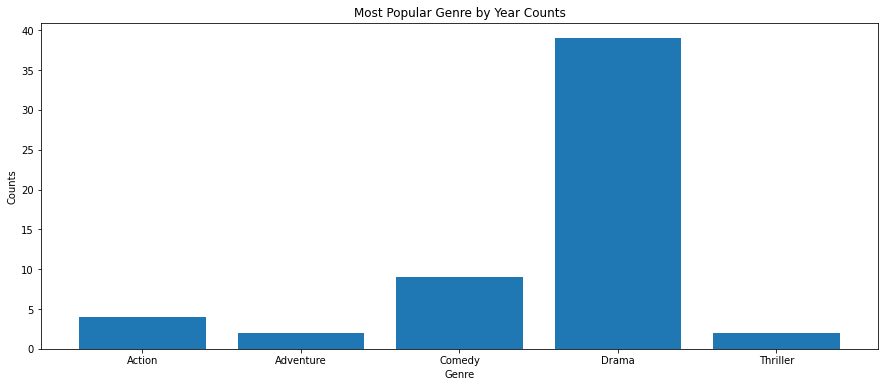

In [18]:
plt.subplots(figsize=(15, 6))
plt.bar(most_popular_genre_by_year_counts.index, most_popular_genre_by_year_counts,)
plt.title('Most Popular Genre by Year Counts')
plt.xlabel('Genre')
plt.ylabel('Counts')
plt.show()

The graph shows that the Drama genre is the most popular genre in the highest number of years (39 years). 

In [19]:
# let's see the overall genre popularity over the 56years. 
genre_popularity = df_q1.groupby(['genres'],)['popularity'].sum()
genre_popularity

genres
Action             2208.834685
Adventure          1697.915054
Animation           595.674975
Comedy             2247.759649
Crime              1009.232253
Documentary          94.344445
Drama              2816.114145
Family              968.388793
Fantasy             909.441171
Foreign              36.001309
History             192.362605
Horror              761.788804
Music               198.827043
Mystery             558.909827
Romance            1013.644468
Science Fiction    1231.498492
TV Movie             45.239592
Thriller           2156.320050
War                 196.474450
Western              97.451554
Name: popularity, dtype: float64

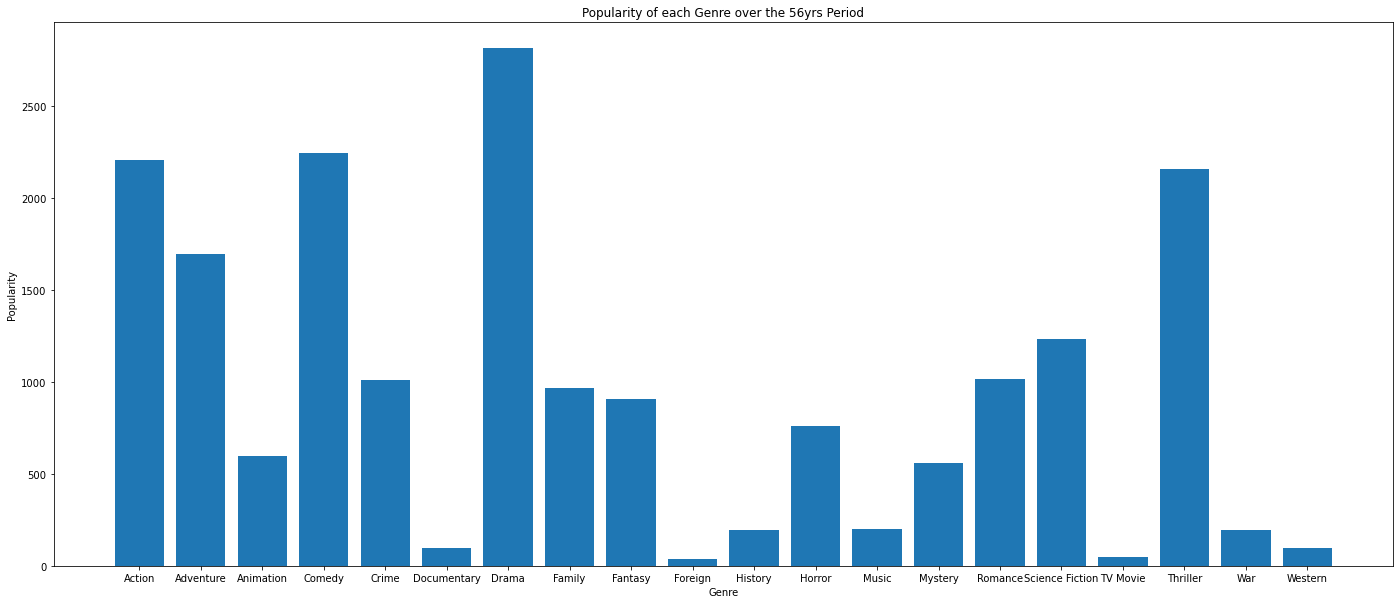

In [20]:
plt.subplots(figsize=(24, 10))
plt.bar(genre_popularity.index, genre_popularity,)
plt.title('Popularity of each Genre over the 56yrs Period')
plt.xlabel('Genre')
plt.ylabel('Popularity')
plt.show()

From the graph above, we see that the most popular movie genre is drama with total popularity value of 2816.114145,
followed by Comedy with total popularity value of 2247.759649. While Foreign movies were the least popular.

### Research Question 2: What kinds of properties are associated with movies that have high revenues?

In [21]:
# Let's see the first five rows of the question two data
df_q2.head

<bound method NDFrame.head of                      original_title  runtime  popularity  \
0                    Jurassic World      124   32.985763   
1                Mad Max: Fury Road      120   28.419936   
2                         Insurgent      119   13.112507   
3      Star Wars: The Force Awakens      136   11.173104   
4                         Furious 7      137    9.335014   
...                             ...      ...         ...   
10861            The Endless Summer       95    0.080598   
10862                    Grand Prix      176    0.065543   
10863           Beregis Avtomobilya       94    0.065141   
10864        What's Up, Tiger Lily?       80    0.064317   
10865      Manos: The Hands of Fate       74    0.035919   

                                          genres release_date  vote_count  \
0      Action|Adventure|Science Fiction|Thriller       6/9/15        5562   
1      Action|Adventure|Science Fiction|Thriller      5/13/15        6185   
2             Adve

In [22]:
# let's see the top 20 movies based on their adjusted revenues.
highest_revenue_movies = df_q2.sort_values(by=['revenue_adj'], ascending = False).head(20)
highest_revenue_movies

,original_title,runtime,popularity,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
1386,Avatar,162,9.432768,Action|Adventure|Fantasy|Science Fiction,12/10/09,8458,7.1,2009,2.408869e+08,2.827124e+09
1329,Star Wars,121,12.037933,Adventure|Action|Science Fiction,3/20/77,4428,7.9,1977,3.957559e+07,2.789712e+09
5231,Titanic,194,4.355219,Drama|Romance|Thriller,11/18/97,4654,7.3,1997,2.716921e+08,2.506406e+09
10594,The Exorcist,122,2.010733,Drama|Horror|Thriller,12/26/73,1113,7.2,1973,3.928928e+07,2.167325e+09
9806,Jaws,124,2.563191,Horror|Thriller|Adventure,6/18/75,1415,7.3,1975,2.836275e+07,1.907006e+09
3,Star Wars: The Force Awakens,136,11.173104,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
8889,E.T. the Extra-Terrestrial,115,2.900556,Science Fiction|Adventure|Family|Fantasy,4/3/82,1830,7.2,1982,2.372625e+07,1.791694e+09
8094,The Net,114,1.136610,Crime|Drama|Mystery|Thriller|Action,7/28/95,201,5.6,1995,3.148127e+07,1.583050e+09
10110,One Hundred and One Dalmatians,79,2.631987,Adventure|Animation|Comedy|Family,1/25/61,913,6.6,1961,2.917944e+07,1.574815e+09
4361,The Avengers,143,7.637767,Science Fiction|Action|Adventure,4/25/12,8903,7.3,2012,2.089437e+08,1.443191e+09


We can see that the movie with the highest adjusted revenue is Avatar.

Now lets see some Scatter plots

In [23]:
# lets define a function to avoid repeating some lines of codes
def graphs(a):
    plt.scatter(highest_revenue_movies['revenue_adj'], highest_revenue_movies[a])
    plt.title('revenue_adj relationships')
    plt.xlabel('revenue_adj')
    plt.ylabel(a)
    plt.show()

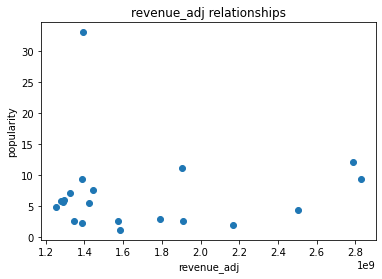

In [24]:
graphs('popularity')

We see that most of the high revenue movies has low popularity of between 1 and 12

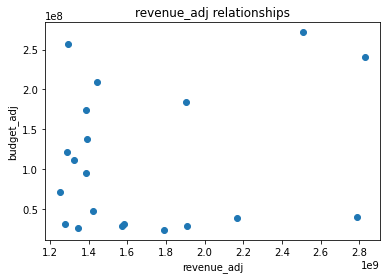

In [25]:
graphs('budget_adj')

We see that all the 20 highest revenue movies has budget_adj less than 3.0

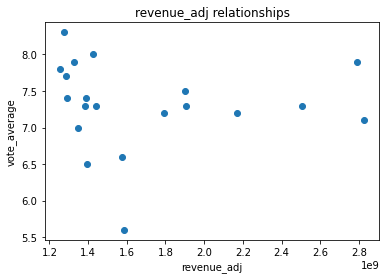

In [26]:
graphs('vote_average')

We see that most of the high revenue movies has vote_average greater than 7.0

<a id='conclusions'></a>
## Conclusions

From this dataset, we have been able to discover that:
1. The Drama genre was the most popular genre in the highest number of years.
2. The most popular movie genre is drama with total popularity value of 2816.114145, followed by Comedy with total popularity value of 2247.759649. While Foreign movies were the least popular.
3. The movie with the highest revenue is Avatar followed by Star wars.
4. Most of the top 20 high revenue movies has low popularity of between 1 and 12 and they all have budget_adj less than 3.0.
5. And most of the high revenue movies has vote_average greater than 7.0.

Information from this dataset could help movie companies make better decisions on the genre of movie to produce, estimated budget, revenue forecast, etc.

## Limitations and Challenges
The major challenge was that most of the rows in the genres column had multiple values separated with '|' and arranged in alphabetical order. This made me to explode the genres column, thereby increasing the number of rows and duplicating the values in other columns. That is why I did not do the exploding of the genres column in the main data, so that the duplications will not affect the second question.

## References
https://stackoverflow.com/questions/12680754/split-explode-pandas-dataframe-string-entry-to-separate-rows
https://stackoverflow.com/questions/2421388/using-group-by-on-multiple-columns